In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('loan.csv')

In [49]:
print("Data sample:")
print(df.head())

Data sample:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2      

In [51]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [53]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\MI\AppData\Local\Temp\ipykernel_4156\3936443294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [55]:
for col in ['LoanAmount']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\MI\AppData\Local\Temp\ipykernel_4156\2278211628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [57]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [59]:
loan_amount_cap = df['LoanAmount'].quantile(0.99)
df['LoanAmount'] = np.where(df['LoanAmount'] > loan_amount_cap, loan_amount_cap, df['LoanAmount'])

In [61]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

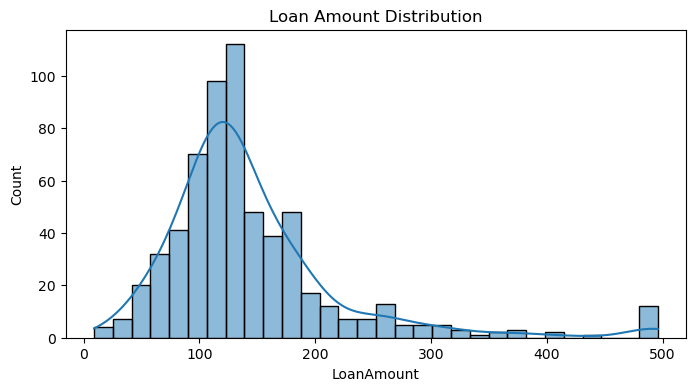

In [63]:
plt.figure(figsize=(8,4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

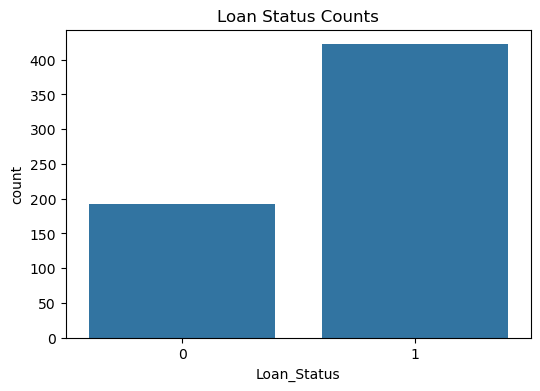

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Counts')
plt.show()

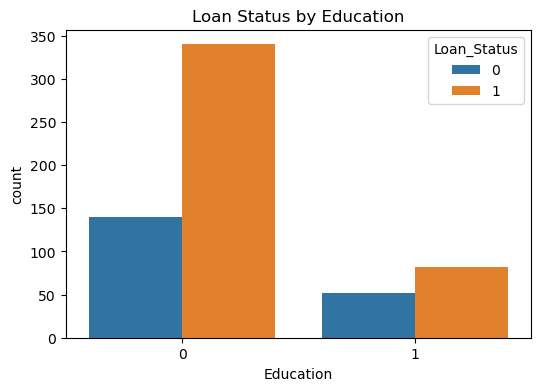

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

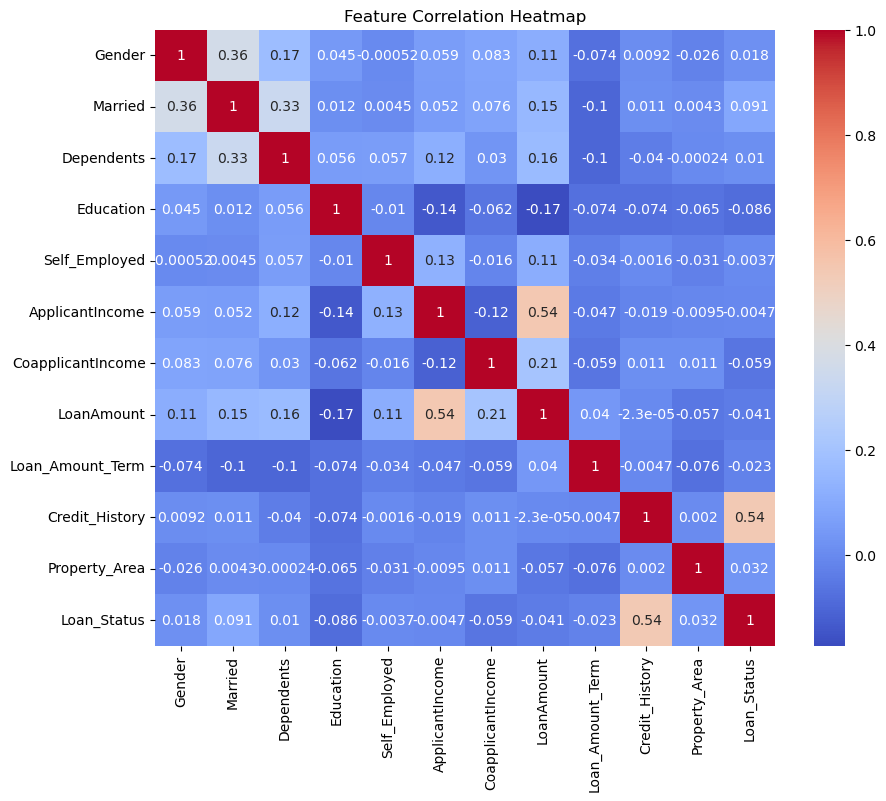

In [69]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [70]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1, errors='ignore') 
y = df['Loan_Status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

C:\Users\MI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [74]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return acc
print("\nLogistic Regression Performance:")
acc_logreg = evaluate_model(logreg, X_test, y_test)
print("\nRandom Forest Performance:")
acc_rf = evaluate_model(rf, X_test, y_test)


Logistic Regression Performance:
Accuracy: 0.7886
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]

Random Forest Performance:
Accuracy: 0.7480
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123

Confusion Matrix:
[[18 25]
 [ 6 74]]


In [75]:
best_model = rf if acc_rf > acc_logreg else logreg
print(f"\nBest model selected: {'Random Forest' if best_model==rf else 'Logistic Regression'}")


Best model selected: Logistic Regression


In [77]:
import pickle
pickle.dump(best_model, open('../app/loan_model.pkl', 'wb'))